In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML
display(HTML("<style>.container{width:100% !important; }</style>"))
import matplotlib.pyplot as plt
font = {'size':14}
import matplotlib
matplotlib.rc('font',**font)
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS

DATASETS A UTILIZAR
Los datasets aquí utilizados ya han sido transformados y vueltos a cargar como csv limpio.

In [2]:
udemy = pd.read_csv('dsets/udemy.csv')

In [3]:
edx = pd.read_csv('dsets/edx.csv')

In [171]:
coursera_rev = pd.read_csv('dsets/C_reviews.csv')

In [172]:
coursera_data = pd.read_csv('dsets/C_data.csv')

In [281]:
oulad = pd.read_csv('dsets/studentInfo.csv')


### PRESENTACION GENERAL


Se realiza el análisis exploratorio de datos de empresas vigentes en el mercado de MOOCs, con el objetivo general de conocer las características de los productos ofrecidos, perfilando así posibles puntos de partida para nuestro cliente. Por otra parte, se evaluarán variables candidatas a convertirse en indicadores del desempeño del negocio. 

Hipótesis de trabajo:
Para delinear los objetivos iniciales del negocio y monitorearlos en el tiempo, será de utilidad cuantificar 2 tipos de conductas observables en los usuarios: las incripciones y el open feedback.
Se analizará el impacto de las variables de interés, en aquellos datasets donde se disponga de los datos:
-precio
-idioma
-nivel
-rating





### ANALISIS EXPLORATORIO DE DATOS






### ANALISIS UNIVARIADO



### Plataforma Udemy

Se exploran las características de los cursos ofrecidos

In [6]:
# período a analizar
print(udemy.published_year.min()) 
print(udemy.published_year.max()) 

2011
2017


In [7]:
# cantidad total de usuarios en los años analizados
udemy.num_subscribers.sum()

11759120

In [8]:
# cantidad total de cursos producidos en el período de interés
len(udemy)


3678



Precio

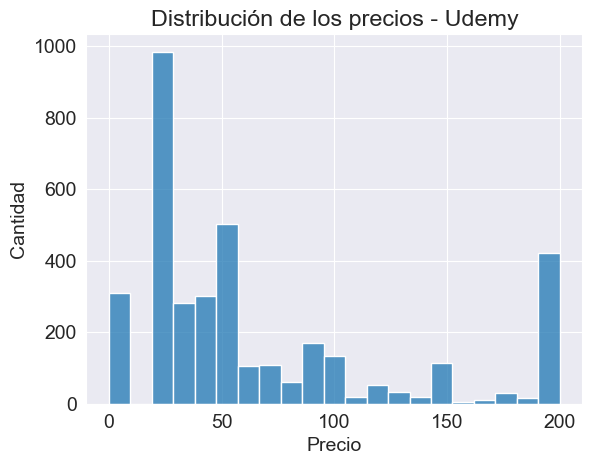

In [9]:
sns.set_style('darkgrid')
sns.histplot(udemy.price)
plt.title('Distribución de los precios - Udemy')
plt.xlabel("Precio")
plt.ylabel('Cantidad')
plt.show()

Text(0.5, 1.0, 'Distribución por cuartiles')

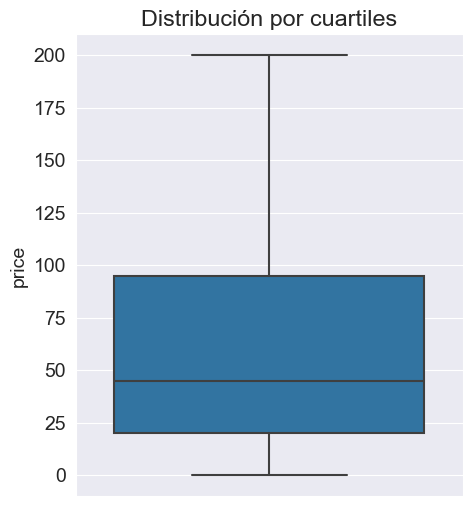

In [10]:
# medidas de tendencia central
fig = plt.figure(figsize=(5,6))
sns.boxplot(data = udemy, y = 'price')
plt.title("Distribución por cuartiles")

Text(0, 0.5, 'Cantidad')

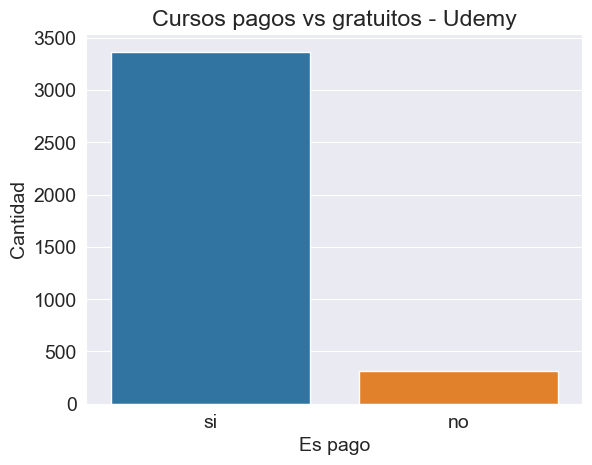

In [11]:
#cantidad de cursos pagos vs gratuitos
sns.countplot(data = udemy, x = 'isPaid')
plt.title('Cursos pagos vs gratuitos - Udemy')
plt.xlabel('Es pago')
plt.ylabel('Cantidad')



Nivel

Text(0, 0.5, 'Cantidad')

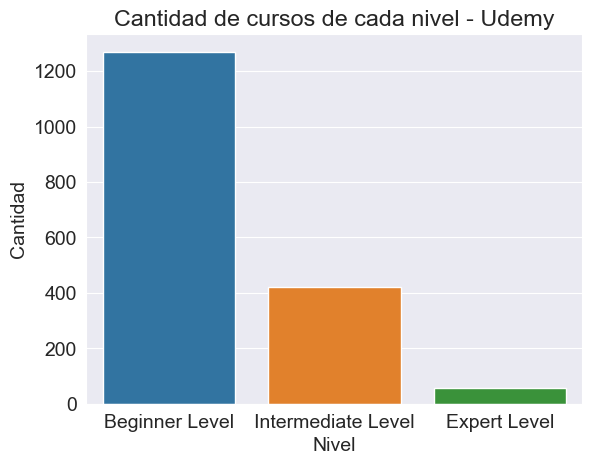

In [12]:
# cantidad de cursos ofrecidos por nivel 
niveles = udemy[udemy['level'].apply(lambda x: any(level in x for level in ['Beginner Level', 'Intermediate Level', 'Expert Level']))]
orden = ['Beginner Level', 'Intermediate Level', 'Expert Level']
sns.countplot(data = niveles, x = 'level', order = orden)
plt.title("Cantidad de cursos de cada nivel - Udemy")
plt.xlabel('Nivel')
plt.ylabel('Cantidad')




Area/tema

Text(0.5, 1.0, 'Cantidad de cursos por tema')

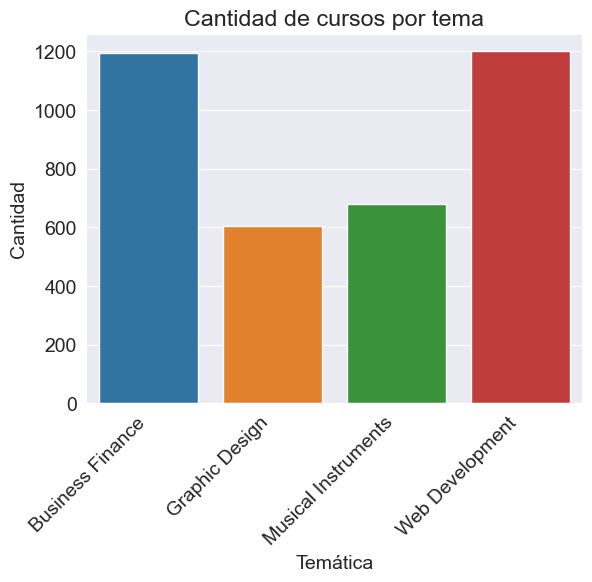

In [13]:
# cantidad de cursos ofrecidos de cada áarea
sns.countplot(data = udemy, x = 'subject')
plt.xlabel('Temática')
plt.ylabel("Cantidad")
plt.xticks(rotation = 45, ha = 'right')
plt.title('Cantidad de cursos por tema')



Duración total

In [14]:
# cantidad de cursos ofrecidos por duración total del mismo
# se usan datos agrupados, se usa la marca de clase correspondiente a cada intervalo 
udemy.rank_duration_hours.value_counts()

0-6.99      3201
7-13.99      315
14-20.99      89
21-27.99      27
28-34.99      21
42-48.99       9
35-41.99       4
56-62.99       4
63-69.99       3
70-76.99       2
49-55.99       1
Name: rank_duration_hours, dtype: int64

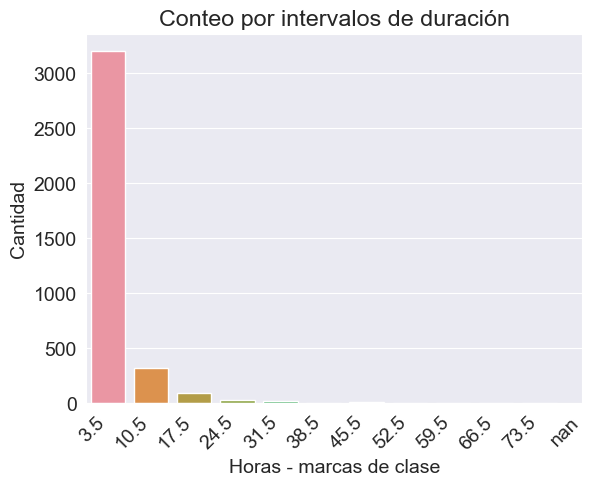

In [15]:
sns.set_style('darkgrid')
sns.countplot(data=udemy, x='cMark_duration')
plt.xlabel('Horas - marcas de clase')
plt.ylabel('Cantidad')

unique_values = sorted(udemy['cMark_duration'].unique())
plt.xticks(range(len(unique_values)), unique_values, rotation=45, ha='right')

plt.title('Conteo por intervalos de duración')
plt.show()


Número total de clases

In [16]:
# cursos ofrecidos por cantidad de clase
# se usan datos agrupados por intervalos. Se usa la marca de clase.
udemy.rank_nLectures.value_counts()


0-59.99       3061
60-119.99      436
120-179.99     101
180-239.99      33
300-359.99      20
240-299.99      12
420-479.99       5
360-419.99       4
480-539.99       3
540-599.99       1
Name: rank_nLectures, dtype: int64

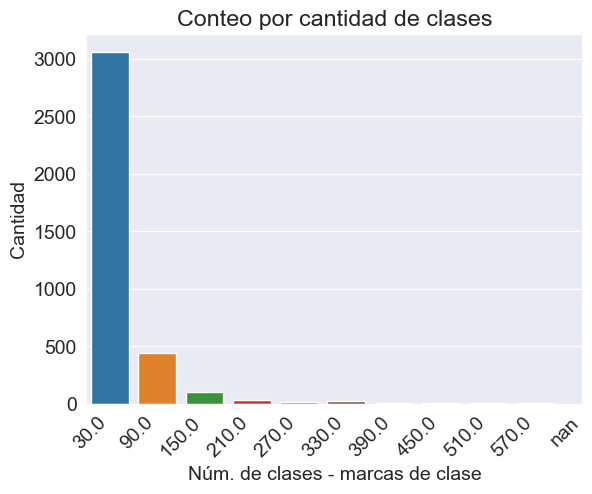

In [17]:
sns.set_style('darkgrid')
sns.countplot(data=udemy, x='cMark_nLectures')
plt.xlabel('Núm. de clases - marcas de clase')
plt.ylabel('Cantidad')

unique_values = sorted(udemy['cMark_nLectures'].unique())
plt.xticks(range(len(unique_values)), unique_values, rotation=45, ha='right')

plt.title('Conteo por cantidad de clases')
plt.show()



Cursos lanzados por año

<Axes: xlabel='published_year', ylabel='count'>

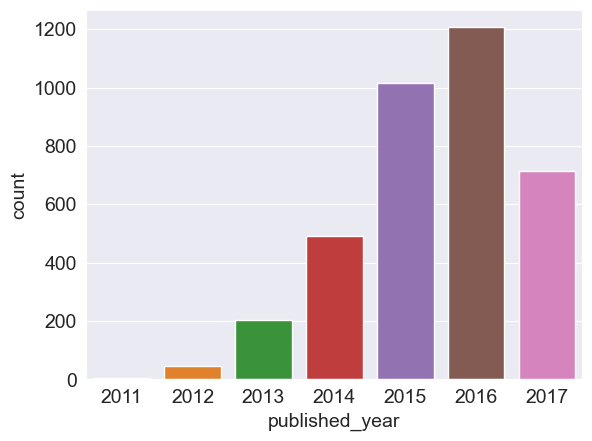

In [18]:
# cursos lanzados por año
sns.set_style('darkgrid')
sns.countplot(x = udemy.published_year)

-En el mes de Junio de 2015, Udemy recibió una ronda de inversión de 65$ millones de dólares, proveniente de Stripes Group.
Fuente: https://about.udemy.com/press-releases/udemy-raises-65-million/


-Los datos cuentan con información de cursos publicados hasta Julio de 2017.


Cursos lanzados por mes

<Axes: xlabel='published_month', ylabel='count'>

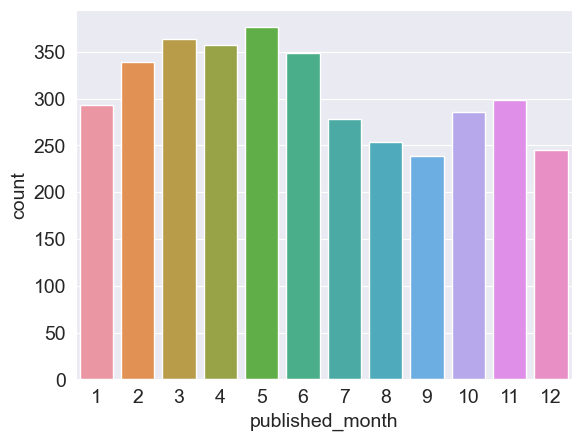

In [19]:
# cursos lanzados por mes
sns.set_style('darkgrid')
sns.countplot(x = udemy.published_month)

Se observa una leve caída en los meses que coinciden con el receso académico en el hemisferio norte y con el receso de Navidad y Fin de año.



Plataforma edx

Se exploran las características de los cursos ofrecidos:


Cantidad de cursos disponibles

In [20]:
len(edx)

975


Precio
Los cursos de EDX pueden tomarse de forma gratuita, y sólo se abona el certificado

Text(0.5, 1.0, 'Distribución del precio')

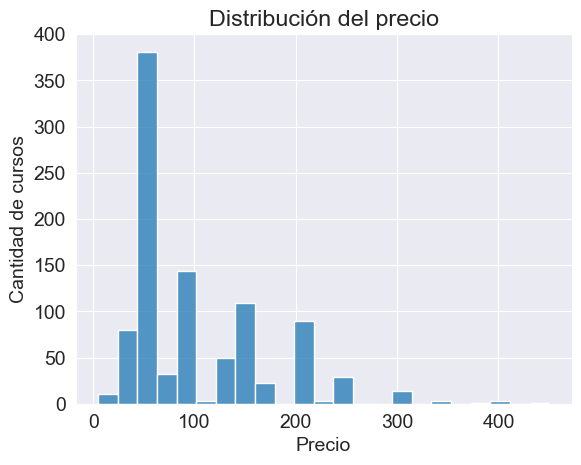

In [22]:
sns.set_style('darkgrid')
sns.histplot(edx.certificate_price)
plt.xlabel('Precio')
plt.ylabel('Cantidad de cursos')
plt.title('Distribución del precio')

Text(0.5, 1.0, 'Distribución por cuartiles')

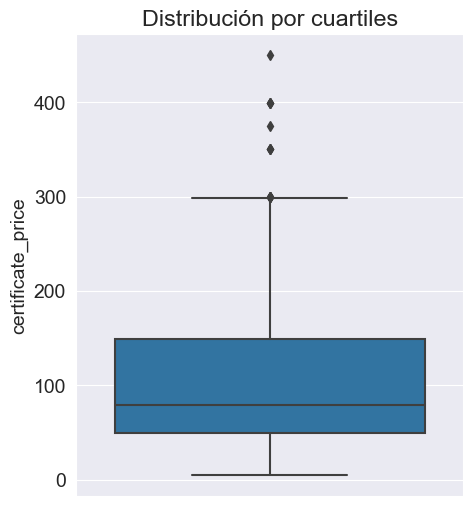

In [25]:
fig = plt.figure(figsize=(5,6))
sns.boxplot(data = edx, y = 'certificate_price')
plt.title("Distribución por cuartiles")



Cursos de cada nivel

In [26]:
edx['Level'].value_counts()

Introductory    621
Intermediate    267
Advanced         87
Name: Level, dtype: int64

Text(0, 0.5, 'Cantidad')

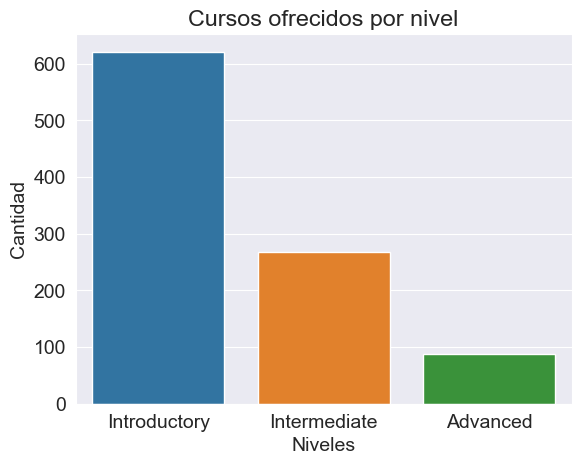

In [31]:
sns.set_style('darkgrid')
sns.countplot(x = edx.Level)
plt.title("Cursos ofrecidos por nivel")
plt.xlabel('Niveles')
plt.ylabel('Cantidad')



Idioma

In [32]:
edx['language'].value_counts()

English          777
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64

C:\Users\romin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\romin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\romin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\romin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\romin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 259

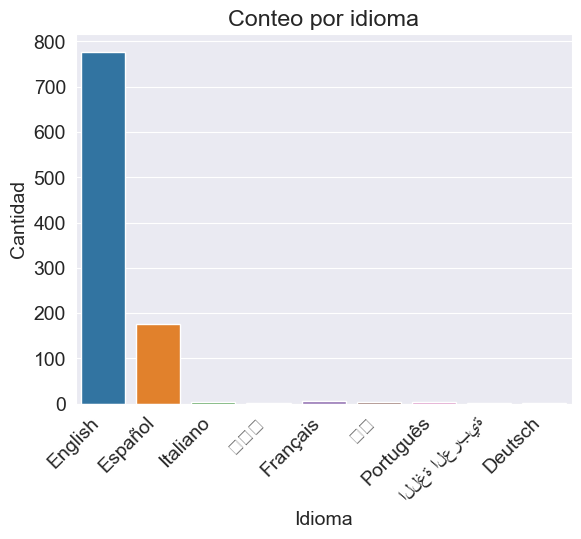

In [37]:
sns.set_style('darkgrid')
sns.countplot(data=edx, x='language')
plt.xlabel('Idioma')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.title('Conteo por idioma')
plt.show()



Tema/área del curso

In [46]:
tema = pd.DataFrame(edx['subject'].value_counts())
tema.head(20)

,subject
Computer Science,166
Business & Management,164
Data Analysis & Statistics,72
Humanities,64
Engineering,58
Social Sciences,51
Economics & Finance,46
Communication,39
Biology & Life Sciences,35
Language,34



Institucion

In [42]:
institucion = pd.DataFrame(edx['institution'].value_counts())
institucion.head(20)


,institution
Harvard University,104
Universitat Politècnica de Valencia,47
Massachusetts Institute of Technology,41
Delft University of Technology,30
IBM,30
Inter-American Development Bank,29
The University of Queensland,26
The University of Michigan,22
Tecnológico de Monterrey,21
Columbia University,20



MOdalidad del curso

Text(0, 0.5, 'Cantidad')

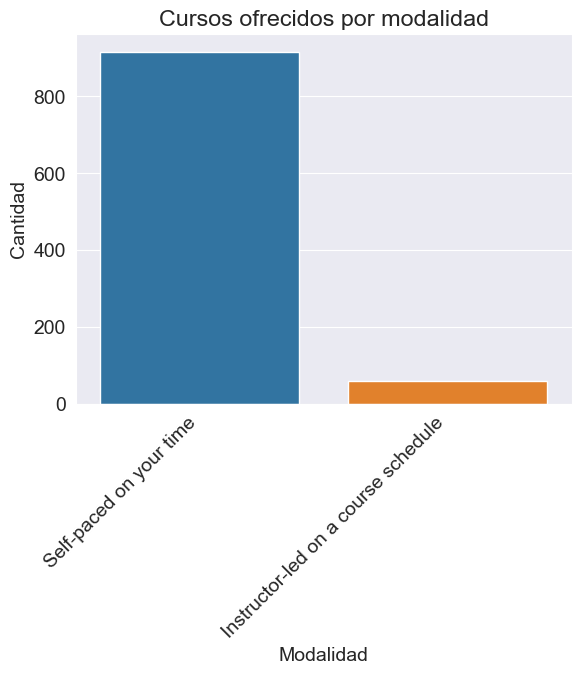

In [45]:
sns.set_style('darkgrid')
sns.countplot(x = edx.course_type)
plt.title("Cursos ofrecidos por modalidad")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Modalidad')
plt.ylabel('Cantidad')


Plataforma Coursera

Se analizan datos provenientes de dos datasets; en el primero se explora el Open Feedback brindado de forma espontánea por los usuarios, en el segundo se  examinan las características de los cursos ofrecidos. 


Período estudiado

In [173]:
print(coursera_rev.year.min())
print(coursera_rev.year.max())

2015.0
2020.0


Cantidad de reseñas totales para el período delimitado

In [174]:
len(coursera_rev)

1454711


Cantidad de reseñas por año

Text(0, 0.5, 'Cantidad')

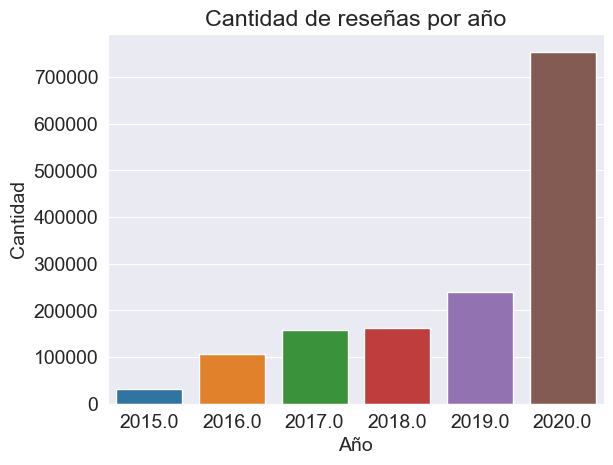

In [175]:
sns.countplot(x = coursera_rev.year)
plt.title("Cantidad de reseñas por año")
plt.xlabel('Año')
plt.ylabel('Cantidad')


Cantidad de reseñas agrupadas por rating

<Axes: xlabel='rating'>

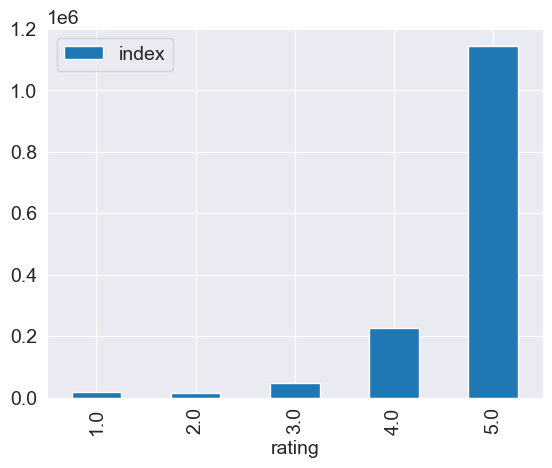

In [176]:
cantidad_reseñas_porRating =pd.pivot_table(coursera_rev, index = 'rating', values = 'index', aggfunc = 'count') 
cantidad_reseñas_porRating.plot.bar()


Cantidad de reseñas de cada institucion

In [177]:
op_fe_institucion = pd.DataFrame(coursera_rev['institution'].value_counts())
op_fe_institucion

,institution
University of Michigan,167069
DeepLearning.AI,117029
Google,78613
IBM,70769
University of Pennsylvania,70531
...,...
Google - Spectrum Sharing,87
IE Business School,82
GitLab,15
Advancing Women in Product,9


10 academias con mas cantidad de reseñas positivas (rating 5)

In [178]:
rating5 = coursera_rev[coursera_rev['rating'] == 5.0] 
top = pd.DataFrame(rating5.institution.value_counts())
top = top.head(10)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'University of Michigan'),
  Text(1, 0, 'DeepLearning.AI'),
  Text(2, 0, 'Google'),
  Text(3, 0, 'University of Pennsylvania'),
  Text(4, 0, 'Stanford University'),
  Text(5, 0, 'University of California San Diego'),
  Text(6, 0, 'Yale University'),
  Text(7, 0, 'IBM'),
  Text(8, 0, 'Johns Hopkins University'),
  Text(9, 0, 'Google Cloud')])

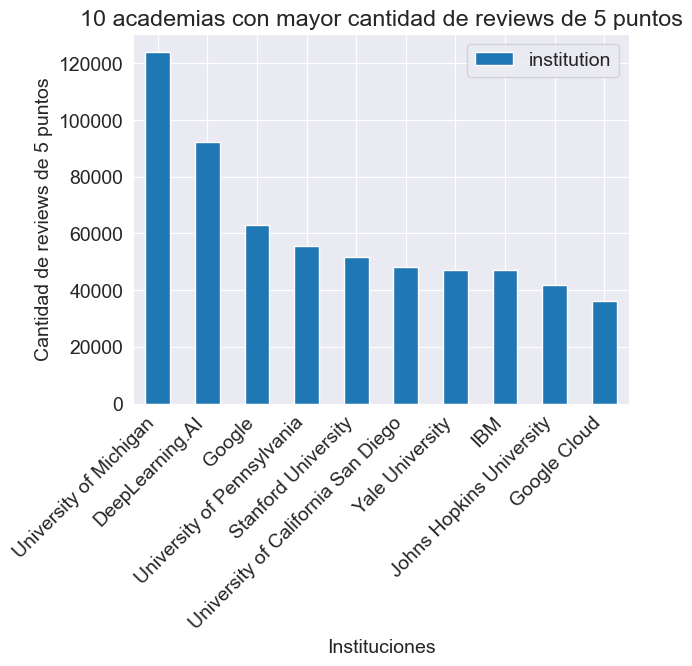

In [179]:
top.plot.bar()
plt.title('10 academias con mayor cantidad de reviews de 5 puntos')
plt.xlabel('Instituciones')
plt.ylabel('Cantidad de reviews de 5 puntos')
plt.xticks(rotation = 45, ha = 'right')

Conceptos mas frecuentes en los títulos de Coursera

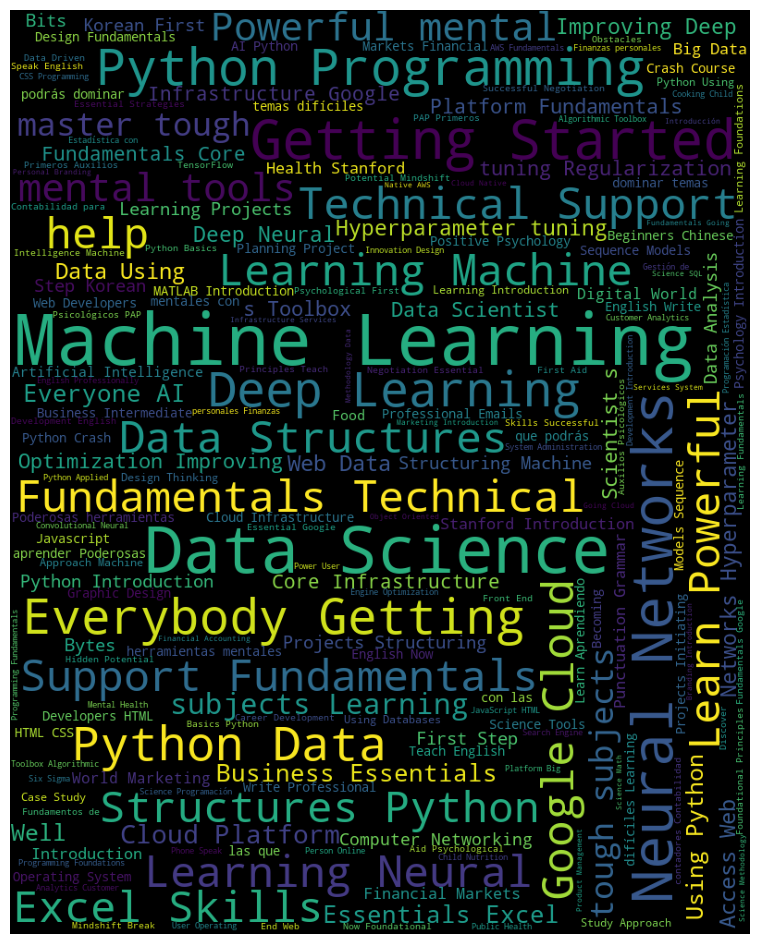

In [110]:
titulos_txt = ' '.join(coursera_rev['name'].astype(str))
stopwords2 = STOPWORDS
#fig = plt.figure(figsize=(12, 12))
wc2 = WordCloud(background_color = 'black', stopwords = stopwords2, height = 1000, width = 800)
wc2.generate(titulos_txt)
fig = plt.figure(figsize=(12, 12))
plt.imshow(wc2)
plt.axis('off')
plt.show()

Conceptos mas frecuentes en las reseñas de 5 puntos

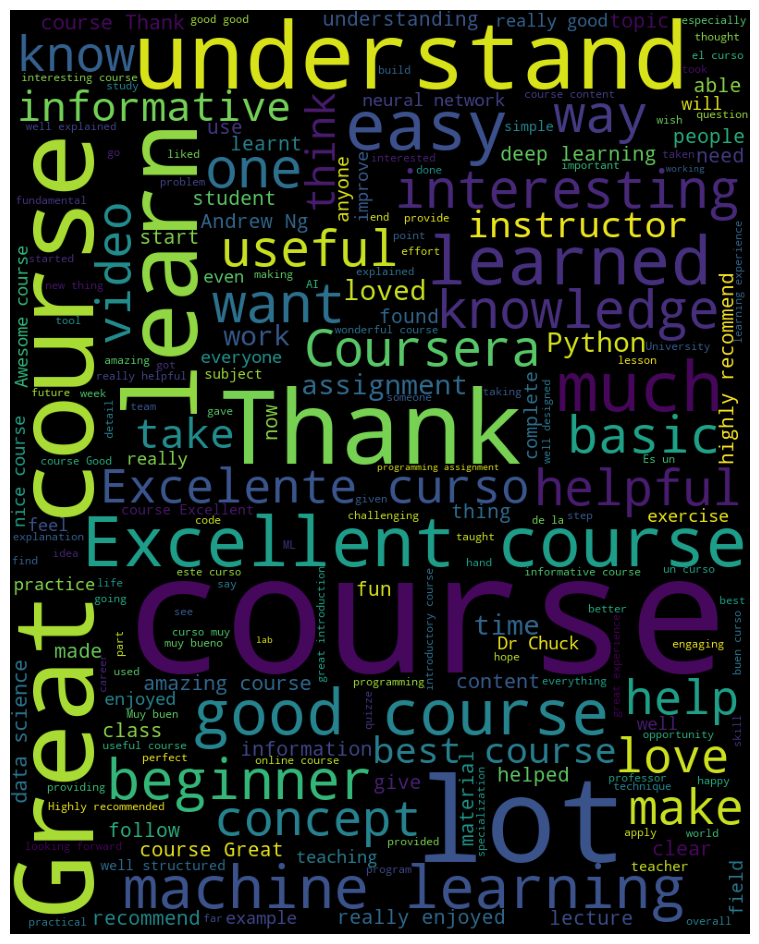

In [111]:
titulos_txt = ' '.join(rating5['reviews'].astype(str))
stopwords2 = STOPWORDS
wc2 = WordCloud(background_color = 'black', stopwords = stopwords2, height = 1000, width = 800)
wc2.generate(titulos_txt)
fig = plt.figure(figsize=(12, 12))
plt.imshow(wc2)
plt.axis('off')
plt.show()

Adjetivos utilizados en las reseñas: easy, amazing, awesome, interesting, helpful, great, excellente, useful, informative, best, challenging, clear, etc.

Plataforma Oulad

Este dataset contiene información demoagráfica sobre usuarios de cursos en línea de la Open University. Se analizan los datos sobre finalización, desaprobación o abandono de los cursos.

In [ ]:
oulad.head()

In [ ]:
oulad.tail()

In [286]:
oulad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


Text(0, 0.5, 'Cantidad')

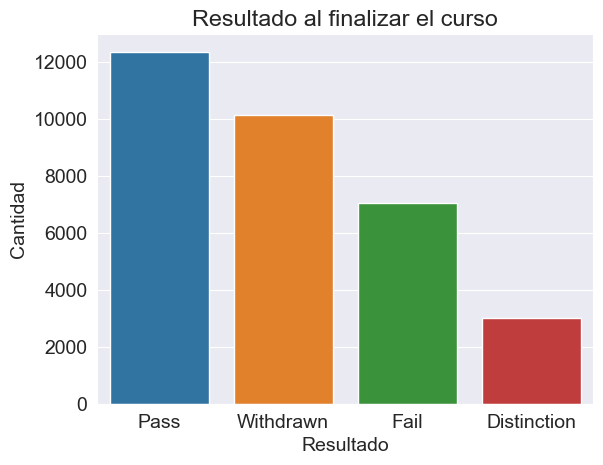

In [289]:
sns.countplot(x = oulad.final_result)
plt.title("Resultado al finalizar el curso")
plt.xlabel('Resultado')
plt.ylabel('Cantidad')




### ANALISIS MULTIVARIADO




Precio del curso / cantidad de inscriptos

In [324]:
pd.pivot_table(udemy, index = 'isPaid', values = 'num_subscribers', aggfunc = 'sum') 

,num_subscribers
isPaid,
no,3575525
si,8183595


Text(0.5, 1.0, 'Cantidad de inscriptos en cursos gratuitos y pagos - Udemy')

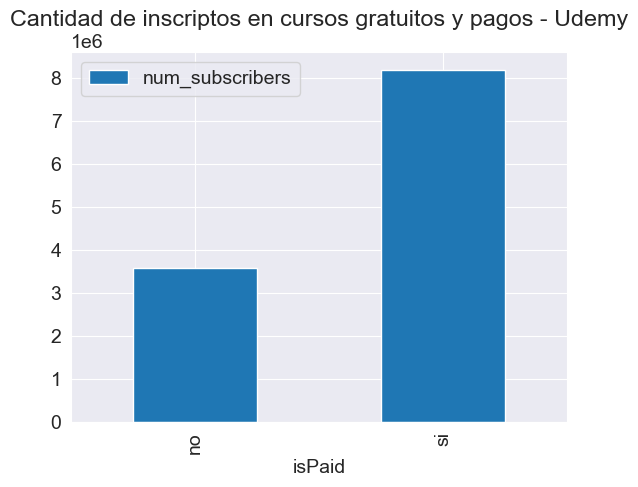

In [329]:
freeVsPaid = pd.pivot_table(udemy, index = 'isPaid', values = 'num_subscribers', aggfunc = 'sum') 
freeVsPaid.plot.bar()
plt.title('Cantidad de inscriptos en cursos gratuitos y pagos - Udemy')



Cantidad de inscriptos en cursos pagos y gratuitos, por nivel
-se procura inferir la predisposición a tomar cursos pagos, según el nivel de complejidad.

Text(0, 0.5, 'Cantidad de inscriptos')

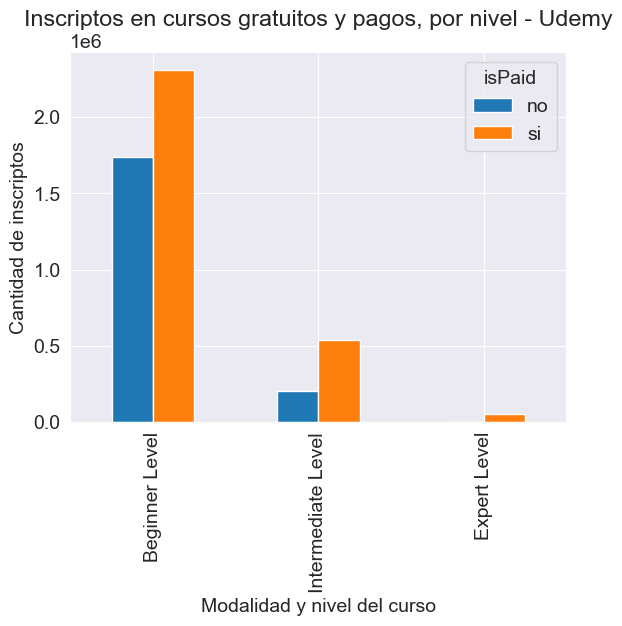

In [332]:
pagosVsgratis_nivel = pd.pivot_table(udemy, index = 'level', values = 'num_subscribers', columns = 'isPaid', aggfunc = 'sum') 
orden = ['Beginner Level', 'Intermediate Level', 'Expert Level']
pagosVsgratis_nivel = pagosVsgratis_nivel.reindex(orden)
pagosVsgratis_nivel.plot.bar()
plt.title('Inscriptos en cursos gratuitos y pagos, por nivel - Udemy')
plt.xlabel('Modalidad y nivel del curso')
plt.ylabel('Cantidad de inscriptos')




Nivel/cantidad de inscriptos

In [335]:
pd.pivot_table(udemy, index = 'level', values = 'num_subscribers', aggfunc = 'sum')

,num_subscribers
level,
All Levels,6915076
Beginner Level,4051843
Expert Level,50196
Intermediate Level,742005


Text(0, 0.5, 'Cantidad de inscriptos')

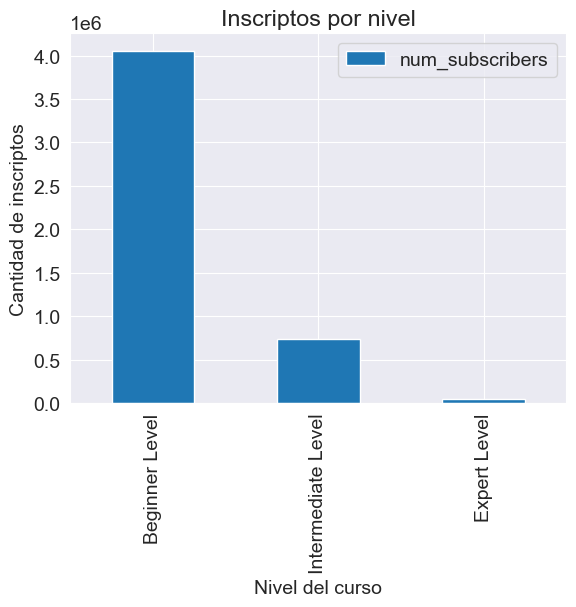

In [334]:
inscriptos_nivel = pd.pivot_table(udemy, index = 'level', values = 'num_subscribers', aggfunc = 'sum') 
orden = ['Beginner Level', 'Intermediate Level', 'Expert Level']
inscriptos_nivel = inscriptos_nivel.reindex(orden)
inscriptos_nivel.plot.bar()
plt.title('Inscriptos por nivel')
plt.xlabel('Nivel del curso')
plt.ylabel('Cantidad de inscriptos')



Comparación entre la cantidad de inscriptos  por área del curso, para los distintos niveles

<Axes: xlabel='level'>

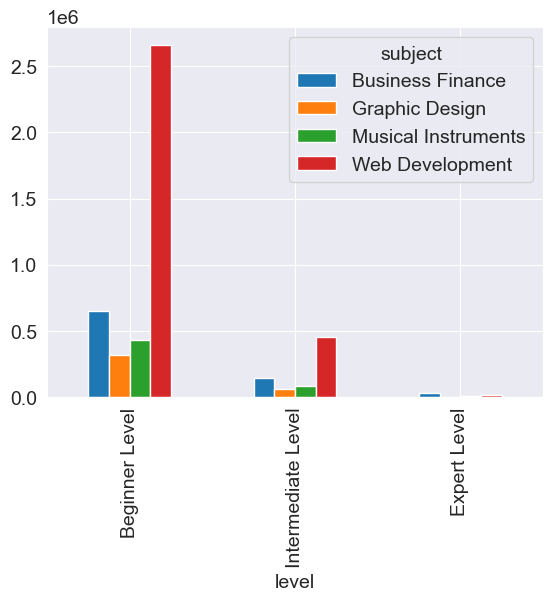

In [336]:
suscriptos_por_nivel = pd.pivot_table(niveles, index = 'level', values = 'num_subscribers', columns = 'subject', aggfunc = 'sum') 
orden = ['Beginner Level', 'Intermediate Level', 'Expert Level']
suscriptos_por_nivel = suscriptos_por_nivel.reindex(orden)
suscriptos_por_nivel.plot.bar()

In [337]:
suscriptos_por_nivel 

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
level,,,,
Beginner Level,647007,315757,429030,2660049
Intermediate Level,144350,58051,84058,455546
Expert Level,30146,1008,5431,13611


Comparación de inscriptos en las dos áreas que ofrecen mayor cantidad cursos:
Caso Business Finance/Web Development

In [339]:
df_dev_fin =  pd.pivot_table(udemy[(udemy['subject'] == 'Business Finance') | (udemy['subject'] == 'Web Development')], index = 'subject', values = 'num_subscribers', aggfunc = 'sum')
df_dev_fin['n_courses'] = 0
df_dev_fin['n_courses'][0] = len(udemy[udemy['subject'] == 'Business Finance'])
df_dev_fin['n_courses'][1] = len(udemy[udemy['subject'] == 'Web Development'])

In [340]:
df_dev_fin

,num_subscribers,n_courses
subject,,
Business Finance,1868711,1195
Web Development,7980572,1200


Número de inscriptos / idioma 

In [341]:
pd.pivot_table(edx, index = 'language', values = 'n_enrolled', aggfunc = 'sum').sort_values(by='n_enrolled', ascending = False)

,n_enrolled
language,
English,41215599
Español,3704975
Italiano,281585
Français,161848
日本語,62757
中文,56158
Português,44021
Deutsch,10657
اللغة العربية,0




Ganancia por cursos, en función de las variables requeridas:

In [342]:
ganancia = edx[['title', 'n_enrolled', 'certificate_price', 'language', 'Level']]
ganancia['ganancia_curso'] = ganancia.n_enrolled * ganancia.certificate_price

C:\Users\romin\AppData\Local\Temp\ipykernel_24436\1502179770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ganancia['ganancia_curso'] = ganancia.n_enrolled * ganancia.certificate_price




Los 3 idiomas con mayor cantidad de inscriptos y ganancia promedio que representan:

In [343]:
top_idiomas = pd.pivot_table(edx, index = 'language', values = 'n_enrolled', aggfunc = 'sum').sort_values(by='n_enrolled', ascending = False)
top_idiomas = top_idiomas.head(3)
top_idiomas

,n_enrolled
language,
English,41215599
Español,3704975
Italiano,281585



Ganancia promedio según el idioma:
asumiendo que todos los alumnos compraron el certificado final.

In [344]:
print('Ganancia promedio por curso en idioma ingles: ', round(ganancia[ganancia['language'] == 'English'].ganancia_curso.sum() / len(ganancia[ganancia['language'] == 'English']), 2))
print('Ganancia promedio por curso en idioma italiano: ', round(ganancia[ganancia['language'] == 'Italiano'].ganancia_curso.sum() / len(ganancia[ganancia['language'] == 'Italiano']), 2))
print('Ganancia promedio por curso en idioma español: ', round(ganancia[ganancia['language'] == 'Español'].ganancia_curso.sum() / len(ganancia[ganancia['language'] == 'Español']), 2))


Ganancia promedio por curso en idioma ingles:  6091300.77
Ganancia promedio por curso en idioma italiano:  3449416.25
Ganancia promedio por curso en idioma español:  1055940.13



Ganancia por nivel del curso

In [345]:
print('Ganancia promedio por curso de nivel Introductorio: ', round(ganancia[ganancia['Level'] == 'Introductory'].ganancia_curso.sum() / len(ganancia[ganancia['Level'] == 'Introductory']), 2))
print('Ganancia promedio por curso de nivel Intermediate: ', round(ganancia[ganancia['Level'] == 'Intermediate'].ganancia_curso.sum() / len(ganancia[ganancia['Level'] == 'Intermediate']), 2))
print('Ganancia promedio por curso de nivel Advanced: ', round(ganancia[ganancia['Level'] == 'Advanced'].ganancia_curso.sum() / len(ganancia[ganancia['Level'] == 'Advanced']), 2))


Ganancia promedio por curso de nivel Introductorio:  4956963.97
Ganancia promedio por curso de nivel Intermediate:  4394336.45
Ganancia promedio por curso de nivel Advanced:  8223375.69



Cantidad de inscriptos / Institucion

In [346]:
pd.pivot_table(edx, index = 'institution', values = 'n_enrolled', aggfunc = 'sum').sort_values(by='n_enrolled', ascending = False)

,n_enrolled
institution,
Harvard University,13459914
The University of Queensland,2301994
Universitat Politècnica de Valencia,2117083
"University of California, Berkeley",1840798
Massachusetts Institute of Technology,1547111
...,...
University of Maryland Global Campus-University System of Maryland,0
IsraelX,0
RWTH Aachen University,0



KPIs
### INDICADORES PROPUESTOS


1

Número de usuarios pagos / números de usuarios gratuitos * 100

In [180]:
condicion = pd.pivot_table(udemy, index = 'isPaid', values = 'num_subscribers', aggfunc = 'sum') 
condicion

,num_subscribers
isPaid,
no,3575525
si,8183595


In [181]:
round((condicion['num_subscribers'].max()/condicion['num_subscribers'].min()) * 100, 2)

228.88

La tasa de conversión es del 228%. Cada 1 alumno suscripto a un curso gratuito, hay 2.28 suscriptos a cursos pagos. 

2


Cantidad de reseñas / Cantidad de inscriptos * 100

In [273]:
rese_ins = coursera_rev

In [274]:
rese_ins['name'].isna().sum()

3206

In [275]:
rese_ins = rese_ins.dropna(subset='name')

In [276]:
len(rese_ins)

1451505

In [277]:
del rese_ins['Unnamed: 0']
del rese_ins['reviewers']
del rese_ins['date_reviews']
del rese_ins['index']
del rese_ins['year']
del rese_ins['institution']
rese_ins = rese_ins.rename(columns = {'name': 'course_title'})


In [278]:
rese_ins = rese_ins.merge(coursera_data, how = 'outer', on = 'course_title')
rese_ins = rese_ins.dropna(subset='rating')


In [279]:
len(rese_ins)

1489434

In [280]:
(len(rese_ins) / rese_ins['course_students_enrolled'].sum()) * 100

0.00032043216583891904

La tasa de usuarios que emiten reviews es del 0.0003.

3

Cantidad de usuarios que aprueban / cantidad de usuarios que abandonan * 100

In [312]:
round(len(oulad[oulad['final_result'] == 'Pass']) / len(oulad[oulad['final_result'] == 'Withdrawn']) * 100, 2)

121.71

Para los datos analizados de la Open University, se halló una tasa del 121% de usuarios que finalizan por sobre los que abandonan. 

In [ ]:
4

Cantidad de reseñas positivas / cantidad de reseñas negativas

In [347]:
round(len(coursera_rev[(coursera_rev['rating'] == 5.0) | (coursera_rev['rating'] == 4.0)]) / (len(coursera_rev[(coursera_rev['rating'] == 2.0) | (coursera_rev['rating'] == 1.0)] )) * 100, 2)

4092.98

La cantidad de reseñas positivas obtenidas por los cursos ofrecidos de Coursera, para el período analizado, fue significativamente mayor que las reseñas negativas. 

5

cantidad de usuarios de cursos Beginner / cantidad de usuarios de curso intermediate * 100

In [366]:
insc_nivel = pd.pivot_table(edx, index = 'Level', values = 'n_enrolled', aggfunc = 'sum') 
insc_nivel

,n_enrolled
Level,
Advanced,2999021
Intermediate,10159138
Introductory,32379441


In [372]:
round((insc_nivel.iloc[1]['n_enrolled'] / insc_nivel.iloc[2]['n_enrolled']) * 100, 2)

31.38

La tasa de inscriptos en niveles intermedios por sobre niveles básicos es el 31%. Suponiendo una gradación en los cursos ofrecidos, tomando como medida de éxitos que los ususarios finalicen cursos introductorios y tomen los niveles siguientes, será una medida a monitorear. 